<a href="https://colab.research.google.com/github/MohmedZeibreal/Regression-car-price-prediction-/blob/main/project_Basic_ML_REGRESSION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic ML

 Please upload your dataset (CSV or Excel).


Saving USA_cars_datasets.csv to USA_cars_datasets.csv

✔ Uploaded File: USA_cars_datasets.csv

 Dataset Loaded Successfully!


,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left



 Available Columns:

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

⚠ Enter EXACT column names as shown above.

 Enter feature columns (comma separated): year, mileage

 Enter target column: price

✔ Features and Target Selected Successfully!

 Data Split Done (80% Train, 20% Test)

 Model Training Completed!

 Model Performance:
------------------------------------
Mean Squared Error (MSE): 122707851.41053426
Root Mean Squared Error (RMSE): 11077.357600553223
R² Score: 0.2257839150824551
------------------------------------


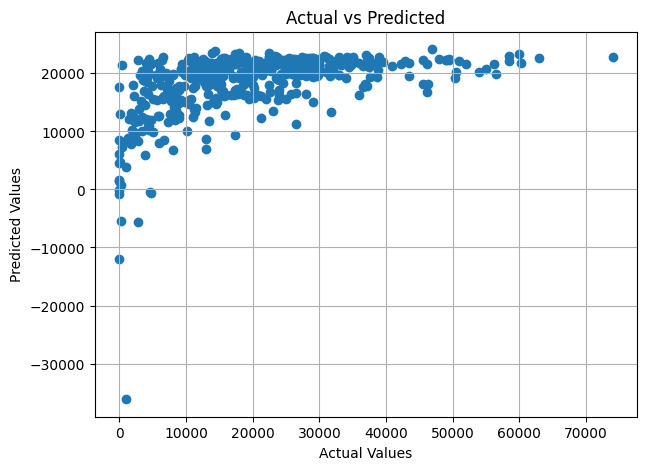


 Regression Coefficients:
year : 894.1510969396418
mileage : -0.05048991500544247

 All Done!


In [ ]:
# ============================================
#     BASIC MACHINE LEARNING – REGRESSION
#        WITH USER DATASET UPLOAD (COLAB)
# ============================================

# --- Import Libraries --- #
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# --- STEP 1: Upload Dataset --- #
print(" Please upload your dataset (CSV or Excel).")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
print(f"\n✔ Uploaded File: {file_name}")

# Auto-detect file type
if file_name.endswith(".csv"):
    df = pd.read_csv(file_name)
elif file_name.endswith(".xlsx") or file_name.endswith(".xls"):
    df = pd.read_excel(file_name)
else:
    raise ValueError(" Unsupported File Type! Upload CSV or Excel.")

print("\n Dataset Loaded Successfully!")
display(df.head())


# --- STEP 2: Select Features (X) and Target (y) --- #
print("\n Available Columns:\n")
print(df.columns)

print("\n⚠ Enter EXACT column names as shown above.")
x_cols = input("\n Enter feature columns (comma separated): ").split(",")
x_cols = [col.strip() for col in x_cols]

y_col = input("\n Enter target column: ").strip()

# Extract X and y
X = df[x_cols]
y = df[y_col]

print("\n✔ Features and Target Selected Successfully!")


# --- STEP 3: Split Data --- #
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n Data Split Done (80% Train, 20% Test)")


# --- STEP 4: Train Model --- #
model = LinearRegression()
model.fit(X_train, y_train)

print("\n Model Training Completed!")


# --- STEP 5: Predictions --- #
y_pred = model.predict(X_test)


# --- STEP 6: Evaluation --- #
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n Model Performance:")
print("------------------------------------")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")
print("------------------------------------")


# --- STEP 7: Plot Actual vs Predicted --- #
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


# --- STEP 8: Show Coefficients --- #
print("\n Regression Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature} : {coef}")

print("\n All Done!")
